## **Data Engineering Task Notebook**

This notebook is designed to test you through various Data Engineering tasks using the Online Retail II dataset. The tasks will help you develop essential skills in data cleaning, feature engineering, and transforming raw data into valuable insights. You'll explore tasks like handling missing values, aggregating data, creating new features, and performing data joins to simulate real-world data workflows. These tasks will prepare you for more advanced data manipulation and analysis, enhancing your ability to work with large, complex datasets.

# **About the Dataset**
This Online Retail II dataset contains transactional data from a UK-based online retailer selling unique gift-ware. The data covers transactions that occurred between December 1, 2009 and December 9, 2011. The retailer primarily serves both individual customers and wholesalers. The products sold by the company are all-occasion gift items, including home décor, kitchenware, and other unique items.

The dataset includes detailed information on each transaction, providing valuable insights into customer behavior, sales trends, and product performance over time.



## **What can be done with this dataset?**

**Customer Behavior Analysis:** Explore purchasing patterns, repeat customers, and sales volume across different customer segments.

**Sales Forecasting:** Predict future sales by analyzing past transactions, including seasonal trends and demand fluctuations.

**Market Segmentation:** Identify customer groups based on purchase history and demographic data (e.g., by Country).

**Product Performance:** Analyze which products are bestsellers and which have low turnover, and how prices influence sales.

**Time Series Analysis:** Study trends over time, including hourly, daily, and monthly sales volumes, and identify peak shopping periods.

**Anomaly Detection:** Detect potential fraudulent transactions, cancellations, or unusually high sales activity.
Association Rule Mining: Discover products that are often purchased together and identify cross-sell opportunities.



## **Key Attributes in the Dataset:**

**InvoiceNo:** Unique transaction identifier (with cancellations indicated by 'C' prefix).

**StockCode:** Unique product code for each item sold.

**Description:** Name of the product/item sold.

**Quantity:** Quantity of each product sold in the transaction
.
**InvoiceDate:** Date and time of the transaction.

**UnitPrice:** Price per unit of the product.

**CustomerID:** Unique identifier for each customer.

**Country:** The country where the customer resides.

This dataset is a great resource for learning and practicing various data analysis, machine learning, and business intelligence techniques.

## **Exercise**
Complete the following tasks:
1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset) from Kaggle.
2. Visualize the dataset and it's structure using appropriate libraries and plots.
3. Do some basic cleaning to handle missing values
4. Create the following features:
  *   Revenue
  *   DayOfWeek: to analyze sales trends by weekdays.
  *   TotalRevenue for each CustomerID
  *   Most popular product based on Revenue.
  *   Ordersize by summing Quantity for each InvoiceNo

5. Apply a lambda function to segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
6. Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
7. Wrap all fo the above into an ETL pipeline.

Extra tasks for practicing GroupBy
1. Join CustomerID with TotalRevenue to create Customer_Revenue column
2. Group by Country to find total revenue, total customers, and average order size per country.
3. Group by StockCode to find top-selling products by quantity.
4. Group by CustomerID to calculate the average order value or frequency of purchases.







             








## 1. Load the dataset from Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [11]:
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 43.3M/43.3M [00:02<00:00, 21.5MB/s]

Extracting model files...


Path to dataset files: C:\Users\Bruger\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1


In [12]:
dataset_path = "C:/Users/Bruger/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1"

files = os.listdir(dataset_path)
print(files)

['online_retail_II.xlsx']


In [17]:
file_path = "C:/Users/Bruger/.cache/kagglehub/datasets/lakshmi25npathi/online-retail-dataset/versions/1/online_retail_II.xlsx"

df = pd.read_excel(file_path)

## 2. Visualize the dataset and it's structure using appropriate libraries and plots

In [18]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [19]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [32]:
for i in df["Price"].unique():
    print(i)

6.95
6.75
2.1
1.25
1.65
5.95
2.55
3.75
5.45
1.69
1.45
3.39
8.5
4.65
2.95
4.25
0.85
9.95
8.95
0.65
4.95
0.98
1.15
2.0
1.3
2.5
3.0
1.9
2.15
2.4
6.38
6.4
0.42
1.95
7.95
18.0
0.72
0.55
141.0
0.38
12.75
3.95
130.0
2.12
6.35
0.21
1.49
0.0
14.95
3.45
1.06
2.75
10.95
0.75
5.49
3.25
16.95
0.95
0.29
9.0
19.0
2.25
19.95
9.58
0.34
0.19
10.75
0.64
3.49
0.37
0.1
45.95
18.95
29.95
21.95
5.17
1.7
4.3
2.57
6.91
7.78
8.65
11.26
26.04
6.04
13.0
17.35
12.13
13.87
14.74
3.43
3.04
0.86
0.83
0.43
10.39
30.39
21.7
0.87
1.52
1.73
9.52
6.5
2.16
3.9
5.2
4.33
1.29
9.55
2.59
647.19
20.83
16.48
55.96
68.39
59.35
42.39
50.87
76.3
4.0
74.61
87.39
78.22
80.3
77.13
83.74
1.55
10.65
1.05
0.14
5.1
11.95
8.49
1.85
4.6
3.81
3.35
15.95
1.75
0.36
0.18
34.95
0.12
7.65
7.5
2.17
13.03
7.37
6.07
3.03
470.24
34.74
9.98
5.63
8.68
3.46
10.41
1.72
10.42
7.81
775.24
18.22
69.57
1.24
5.55
0.08
0.06
0.5
79.95
14.75
0.25
19.09
10.85
8.24
6.94
862.67
0.48
0.32
0.67
2.99
1.5
50.0
1998.49
3.5
922.05
30.43
0.22
28.0
8.97
0.16
49.95
15.0
39.

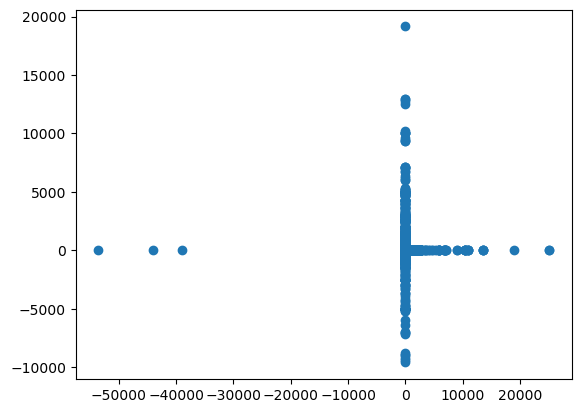

In [26]:
plt.scatter(x = "Price", y = "Quantity", data = df)